# Production Structure

### Input Variables:

$G$ Max number of tenure workers  
$F_0$ Starting Production  
$F_G$ Last Tenure Production  
$\hat{F}$ Peak Production  
$\hat{G}$ Tenure of Peak Production

### Output Variables:

$\mathbb{F}$ Grid with Production of each Tenure worker

## Function:

As of: 28/04/2015

In [27]:
function Production(G::Int,F0::Float64,FG::Float64,FK::Float64,GK::Int)
    
    """Create the Wage Structure of an Economy.
    It fits a second order polynomial for the three parameter values
    and extrapolates for the rest of the tenure values.

    Parameters
    ----------
    G : Max Number of Tenure Workers
    F0: Starting Production 
    FG: Last Tenure Production
    FK: Peak Production
    GK: Tenure of Peak Production
    
    Output
    ----------
    F : Grid with Production of each Tenure worker
    """
    
    V=ones(3,3);
    V[:,2]=[1,GK,G];
    V[:,1]=[1,GK^2,G^2];
    
    Y=[F0,FK,FG];
    
    Coef=V\Y;              # 61/71 = 86%
    
    TGrid=[1:G];
    
    F=ones(G,1)*Coef[3];
    F+=TGrid*Coef[2];
    F+=TGrid.^2*Coef[1];
    
    return collect(F)
    
end

Production (generic function with 1 method)

In [39]:
61/71

0.8591549295774648

## Growing Size

$G$

In [29]:
F_0=0.8;
F_G=1.0;
F̂=1.2;

## Time

Max Size and Sample Size

In [30]:
Ms=400;
Ss=50;

### Test

In [31]:
# Warm Up Run
G=10;
Production(G,F_0,F_G,F̂,div(G,2)+1)   #

t=[1.0:Ms-2];
b=[1.0:Ss];

for i=3:Ms
    
    for j=1:Ss
        
        a=@elapsed Production(i,F_0,F_G,F̂,div(i,2)+1)
        b[j]=a;
        
    end
    
    t[i-2]=minimum(b);
    
end

### Plot Result

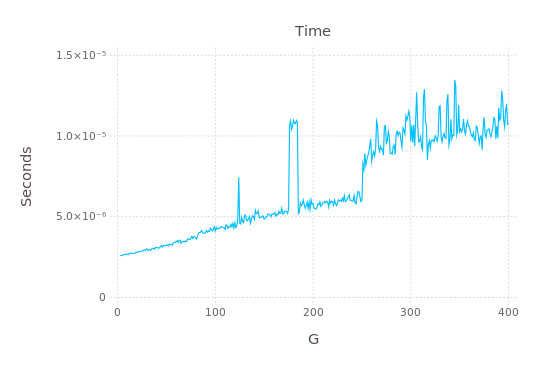

In [32]:
using Gadfly

plot(x=[3:Ms], y=t,Guide.xlabel("G"),Guide.ylabel("Seconds"),Guide.title("Time"), Geom.line)

## Memory

Max Size and Sample Size

In [33]:
Ms=400;
Ss=50;

### Test

In [34]:
# Warm Up Run
G=10;
Production(G,F_0,F_G,F̂,div(G,2)+1)   #

t=[1.0:Ms-2];
b=[1.0:Ss];

for i=3:Ms
    
    for j=1:Ss
        
        a=@allocated Production(i,F_0,F_G,F̂,div(i,2)+1)
        b[j]=a;
        
    end
    
    t[i-2]=minimum(b);
    
end

### Plot Result

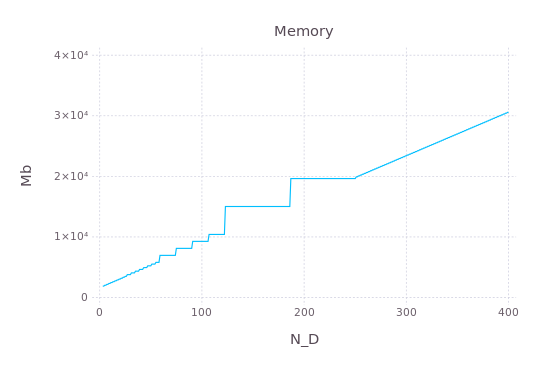

In [35]:
plot(x=[3:Ms], y=t,Guide.xlabel("G"),Guide.ylabel("Mb"),Guide.title("Memory"), Geom.line)

## Profile

In [36]:
G=12;
F_0=0.8;
F_G=1.0;
F̂=1.2;
Ĝ=8;

Sample Size

In [37]:
Rep=10000;

In [38]:
Profile.clear()
@profile (for i=1:Rep;Production(G,F_0,F_G,F̂,Ĝ);end)
Profile.print()

71 task.jl; anonymous; line: 340
 71 ...3/IJulia/src/IJulia.jl; eventloop; line: 123
  71 ...rc/execute_request.jl; execute_request_0x535c5df2; line: 160
   71 loading.jl; include_string; line: 97
    71 profile.jl; anonymous; line: 2
     1  In[27]; Production; line: 21
     1  In[27]; Production; line: 24
     61 In[27]; Production; line: 26
      5  linalg/dense.jl; \; line: 412
       5 linalg/factorization.jl; \; line: 826
        1 linalg/lapack.jl; getrs!; line: 558
         1 linalg.jl; chkstride1; line: 163
        2 linalg/lapack.jl; getrs!; line: 562
        1 linalg/lapack.jl; getrs!; line: 563
      56 linalg/dense.jl; \; line: 415
       56 ./linalg/lu.jl; __lufact#154__; line: 64
        54 ...juliabox/jimg/sys.so; lufact_21_; (unknown line)
         53 ./linalg/lu.jl; __lufact!#151__; line: 13
          1  ./linalg/lapack.jl; getrf!; line: 381
          3  ./linalg/lapack.jl; getrf!; line: 384
          3  ./linalg/lapack.jl; getrf!; line: 385
          46 ./linalg/lapa